In [1]:
#importing all necesessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#importing data from github and converting into a DataFrame
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data=data.drop('Unnamed: 0',axis=1)

In [7]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
#finding number of rows and columns
data.shape

(200, 4)

In [10]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
#finding the null values in each column
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

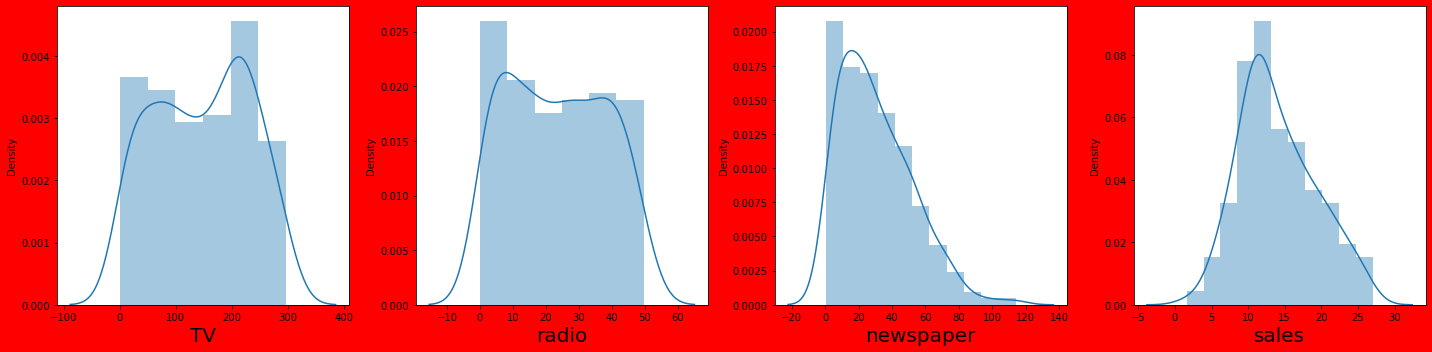

In [19]:
#now the data looks good and there is no missing valuues so we can start visualizing the type of distribution for each feature

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,5), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [24]:
df_features=data.drop('sales', axis=1)

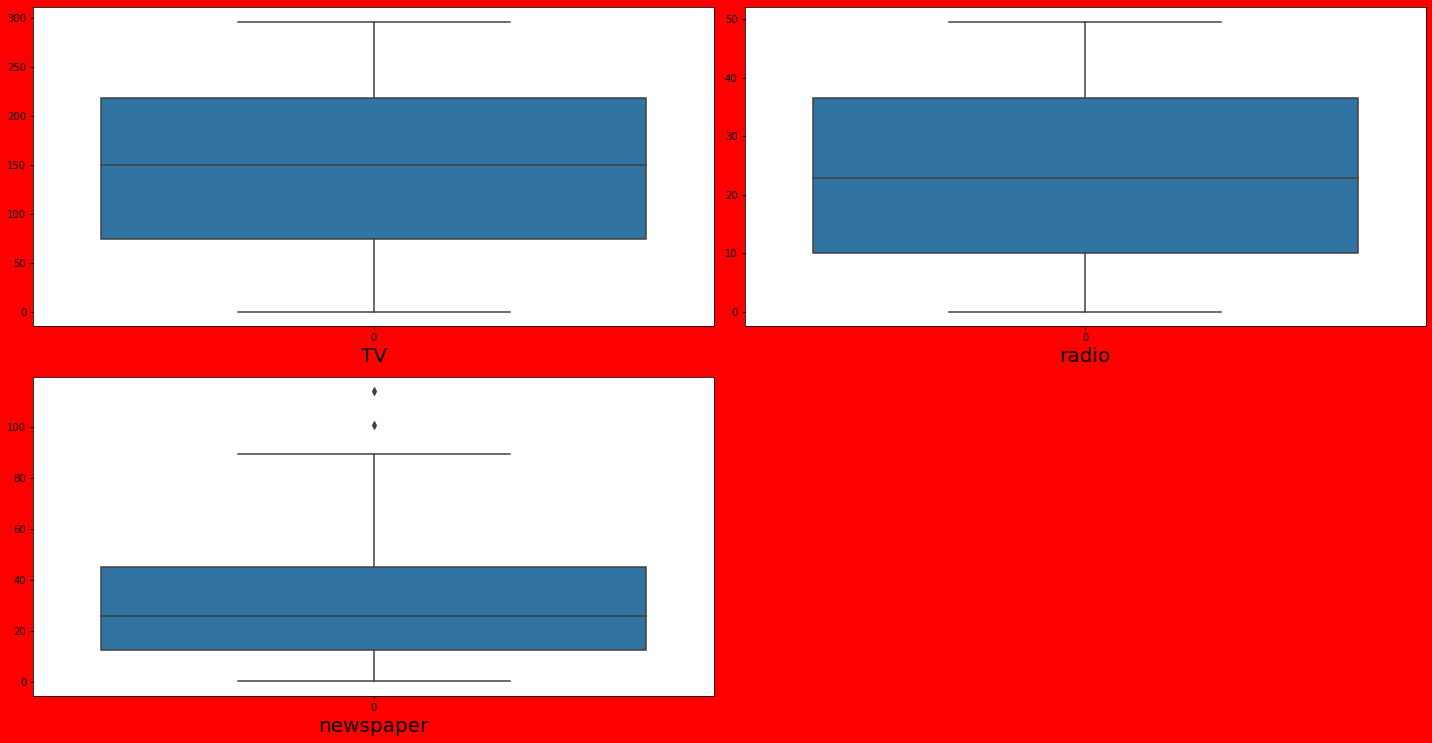

In [25]:
# the distribution looks fairly linear for all the features
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=4:
        plt.subplot(3,2,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [26]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64

In [27]:
#removing the outliers for newspaper
np_high=q3.newspaper + (1.5 * iqr.newspaper)


index=np.where(data['newspaper'] > np_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()


(198, 4)


,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


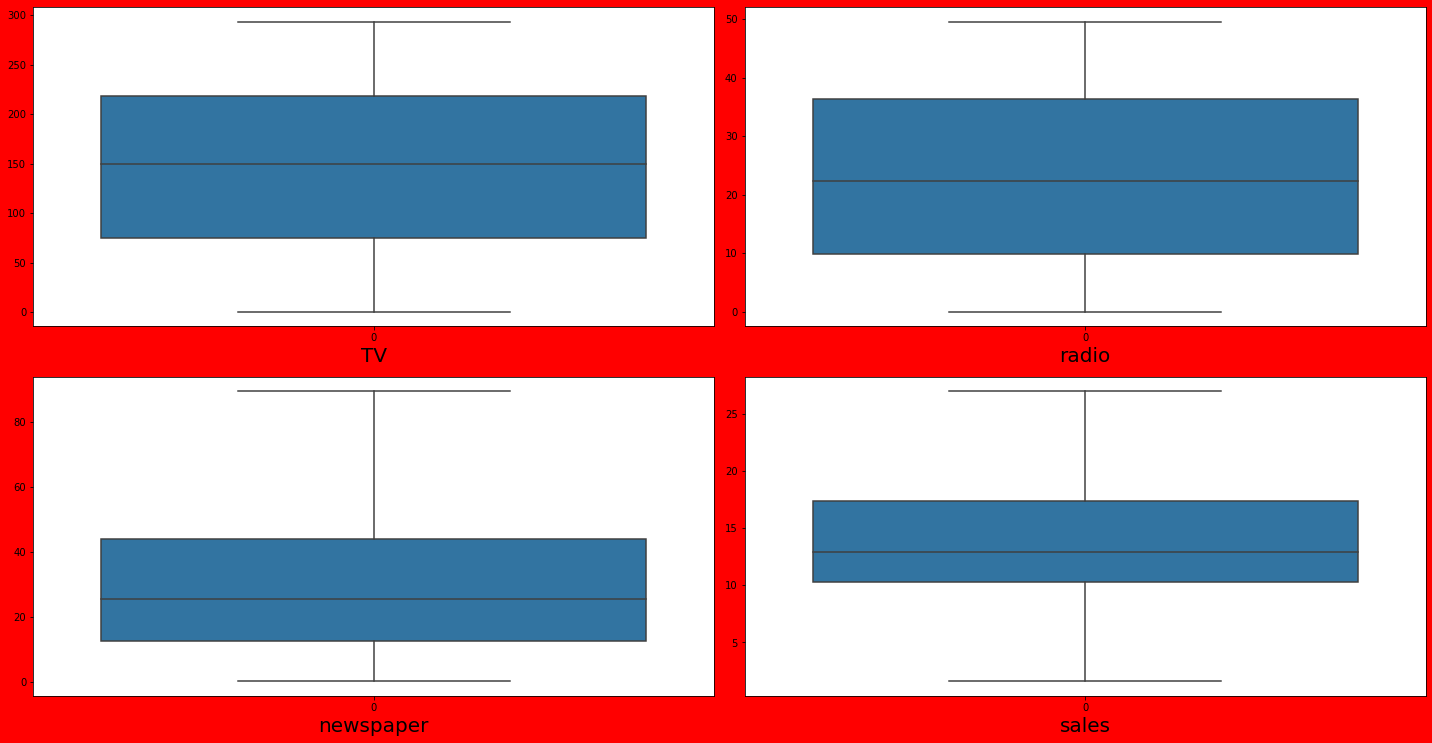

In [30]:
#checking whether the outiers are fixed
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=4:
        plt.subplot(3,2,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

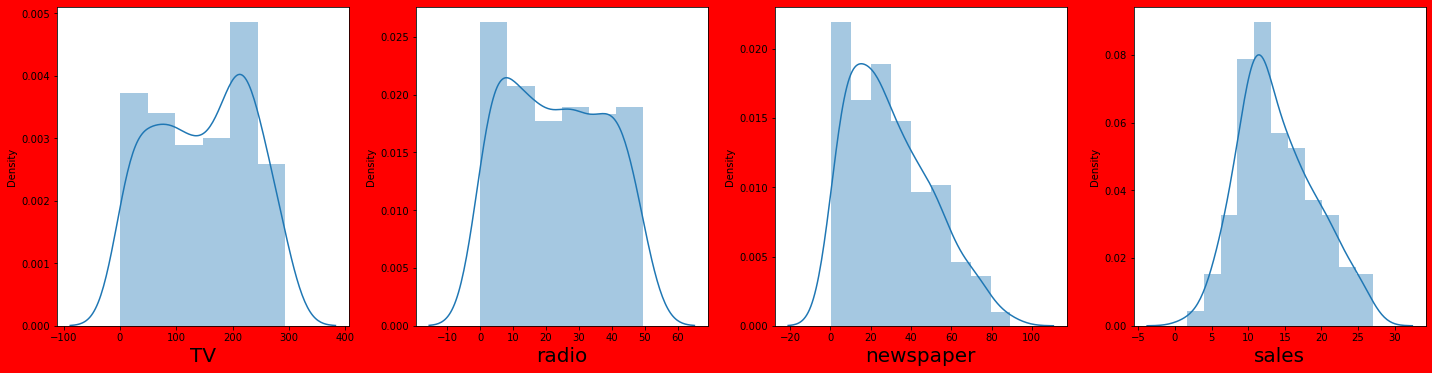

In [31]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [32]:
# the data distribution seems to be good enough and we do not observe any skewness so now lets move on to find the 
# relation between the features and labels

y=data['sales']
x=data.drop(columns=['sales'])

In [33]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [34]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

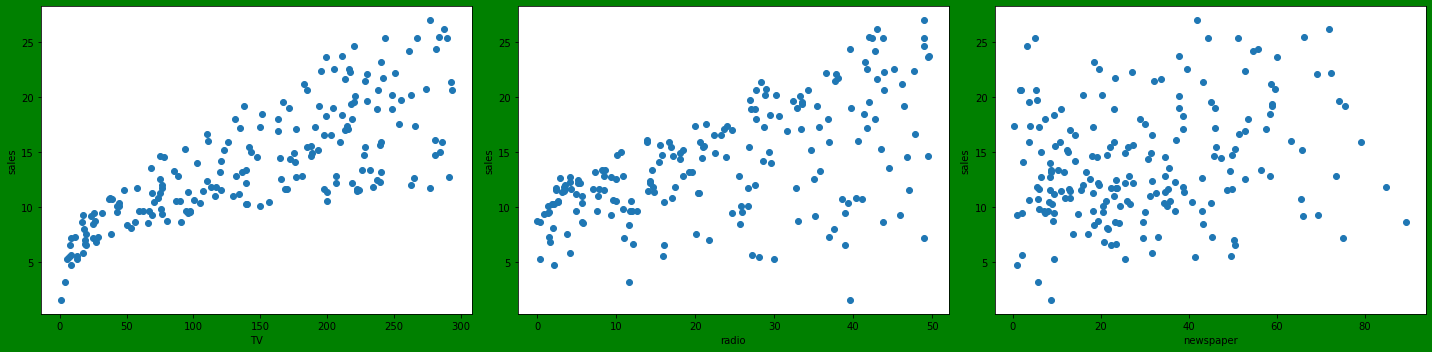

In [37]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,5), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('sales',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
# the relationship  between the labels and feature looks fairly linear, so the linearity assumption is satisfied
#the advertisement in Tv and radio are directly contibuting to sales in a positive way

# As the dependent variable/ label (sales) is a continious data so it is a regression problem and as the features are also
# continious data so we will use linear Regression Model



In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)
y_train.head()


27     15.9
54     20.2
141    19.2
8       4.8
15     22.4
Name: sales, dtype: float64

In [41]:
#model instantiating and training
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [42]:
data.tail()


,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [45]:
#prediction of Happiness_Score
print('sales is ', regression.predict([[38.2,3.7,13.8]]))

sales is  [5.23648144]


In [46]:
#how well the model fits the training data
regression.score(x_train, y_train)

0.9119605638523443

In [47]:
#lets check how well the model fits the testing data
regression.score(x_test, y_test)

0.8356465745966288

In [48]:
y_pred=regression.predict(x_test)
y_pred

array([ 5.23648144, 13.81459551,  8.68538589, 19.36345185, 13.80805994,
       18.34719304, 14.69412819,  8.68808306, 11.85734751,  4.40137378,
       12.06494461,  9.84359723,  8.97944775,  8.07410054, 10.50458595,
       20.16060852, 15.30334038,  8.61982203, 20.90534986, 15.85202657,
       21.79402101, 12.57925807, 15.13261659,  6.96944112, 24.27198717,
       10.96482413,  8.13815767,  9.92588447, 12.16953201, 21.68088052,
       15.43507067,  6.5278799 , 20.53363928, 19.63889488,  9.56337619,
       11.7942501 ,  6.41514446,  6.78644943, 13.5738723 ,  8.82549987,
       16.33345774,  9.87357203, 12.05090757, 12.64166871, 18.50130744,
       14.14899988, 14.23976013, 17.21686201, 14.90432495,  6.0805876 ])

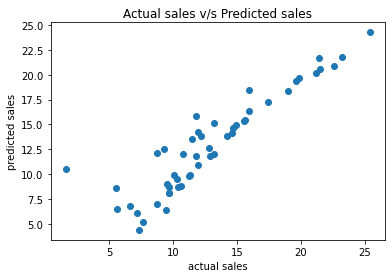

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('Actual sales v/s Predicted sales')
plt.show()